<a href="https://colab.research.google.com/github/torix/LectureOfComplexNetworks/blob/2019/ComplexNetwork01_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NetworkXを使ったネットワークの描画と分析

ネットワークを扱うライブラリは様々な言語で準備されていますが，対話的かつ簡単に利用可能なライブラリとして
PythonのNetworkXがあります．
<br>
本講義ではインストールの必要なくNetworkの計算を行えるよう，Google Colaboratory上でPythonのNetworkXを利用します．



# 0．準備（日本語の表示）


一番最初にGoogleColaboratory上で図に日本語を利用するためのおまじないを実行します．


以下のコードを実行して，出力された値を次のコードに書いて実行します．<br>
これはただのおまじないなので何も気にせずに行ってください．

In [3]:
import matplotlib
%matplotlib inline

!apt-get -y install fonts-ipafont-gothic
import matplotlib
!rm /root/.cache/matplotlib/fontlist-v300.json


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


ここまで実行後，一度ランタイムをリブートします．

一度実行後は，ここまでのコードは実行する必要がありません．

# 1.NetworkXの準備

## 1.1 ライブラリのインストール

ネットワーク描画のためにPythonのライブラリであるNetworkXを利用します．<br>




ネットワークのライブラリであるNetworkXと，描画用にmatplotlibの中のpyplotをインポートします．<br>
%matplotlib inlineはjupyter内でグラフを表示するためのおまじないです．







In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline



## 1.2 NetworkXの基礎

NetworkXでは，
ネットワーククラスにノードとなるオブジェクトと，その間の関係をリンクとして登録することによって
ネットワークを表現します．


ノードとなるオブジェクトは任意のオブジェクトを使えます．<br>
当面は，ラベルとなる数値やテキストをそのまま使うとわかりやすいでしょう．<br>



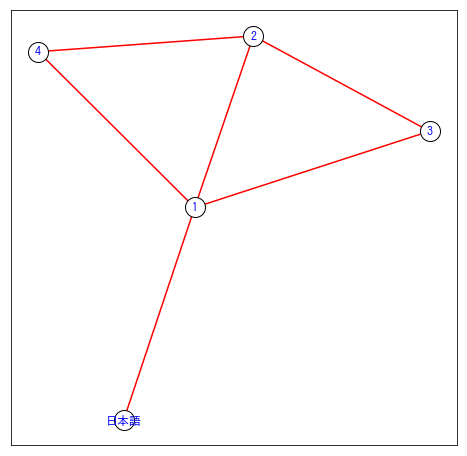

In [9]:
# 無向グラフを作成
G = nx.Graph() 
# 有向グラフの場合は
# G = nx.DiGraph()

# ノードの追加
G.add_node(1) # 単一のノードを追加
G.add_nodes_from([2, 3, 4]) # 複数のノードを同時に追加する場合はlistを使う
G.add_node("日本語") # 文字列をノードとして追加することも可能

# リンクの追加
G.add_edge(1, 2) # ノード1とノード2の間にリンクを生成
G.add_edges_from([(1, 3), (1, 4), (1, "日本語"), (2,3),(2,4),(3, 4)]) # 複数のリンクを追加する場合はタプルのlistを使う．
G.add_edge(1, 5) # ノードとして追加していなかった5を指定すると自動的にノードが登録される

#ノードやリンクの削除
G.remove_node(5)
G.remove_edge(3,4)

#描画する
plt.figure(figsize=(8,8)) # 描画サイズ
# ノードをバネモデルで配置する
pos = nx.spring_layout(G, k=0.3)

# ノード，エッジ，ラベルの描画
nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5) # リンクを赤色，太さ1.5で描画
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black", node_size=400) #ノードを黒枠の白色，大きさ10で描画
nx.draw_networkx_labels(G, pos, font_color='blue', fontsize=14, font_family='IPAGothic', font_weight="bold") #ラベルは，青色，sizeが14，IPAGothic(日本語可)，太字

# 描画
plt.show()


## 1.3 ファイルからのデータ読み込み

ネットワークデータをファイルから読み込むことも可能．<br>
ファイル読み込みの簡易化のための関数readNetwork


In [0]:
import requests
from google.colab import files

def readNetwork(url=None, splitter=","):
  
  # ネットワークを読み込む
  if url == None:
    uploaded = files.upload()
    edge_text = list(uploaded.values())[0].decode()
  else:
    res = requests.get(url)
    res.encoding = res.apparent_encoding
    edge_text = res.text

  # edgeとして読み込める形式に変換
  edge_list = list(item.split(splitter) for item in edge_text.split("\n"))
  edge_list = [a for a in edge_list if len(a) != 1]
  # 無向グラフを作成
  G = nx.Graph() 

  # ネットワークの作成
  G.add_edges_from(edge_list)
  return G

readNetwork関数を使って，講義用ページからネットワークを読み込む

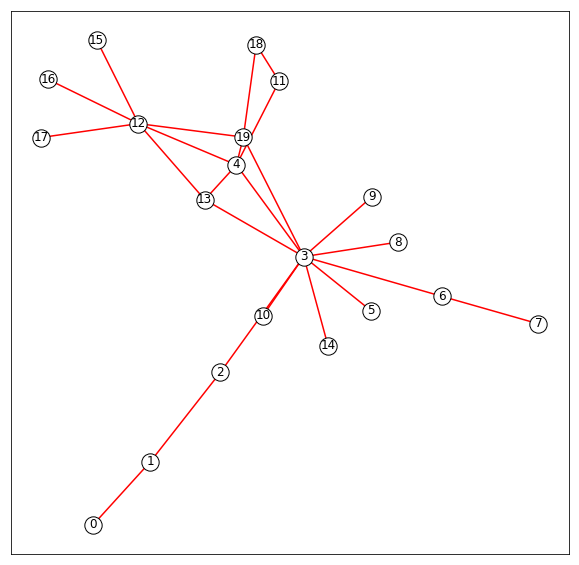

In [14]:
# ここでは，講義用のサイトから
G = readNetwork(url="http://syrinx.q.t.u-tokyo.ac.jp/tori/lecture/complexnetworks/lec1-q2.csv", splitter=",") # urlとsplitterを変更することで任意のファイルを読み込み可能
#描画する
# 描画サイズ
plt.figure(figsize=(10,10))
# ノードをバネモデルで配置する
pos = nx.spring_layout(G, k=0.3)
# ノード，エッジ，ラベルの描画
nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
nx.draw_networkx_labels(G, pos)

# 描画
plt.show()



## 1.4 ローカルファイルからの読み込み

ローカルにある自作のデータやダウンロードしてきたファイルを読み込む場合は，urlの指定無しで

```
G = readNetwork()
```
とすれば，ファイル選択フォームが出てくるので，任意のデータファイルをDrop&Dragすれば読み込むことができます．


区切り文字を指定する場合は，

```
G = readNetwork(splitter=",")
```
の用に指定します．


In [32]:

# URLを指定しなければローカルファイルからファイルを読み込んでネットワークを生成できる．
G = readNetwork()

#描画する
# 描画サイズ
plt.figure(figsize=(40,40))
# ノードをバネモデルで配置する
pos = nx.spring_layout(G, k=0.3)
# ノード，エッジ，ラベルの描画
nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5) # リンクを赤色，太さ1.5で描画
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black", node_size=400) #ノードを黒枠の白色，大きさ10で描画
nx.draw_networkx_labels(G, pos, font_color='blue', fontsize=14, font_family='IPAGothic', font_weight="bold")

# 描画
plt.show()






Output hidden; open in https://colab.research.google.com to view.

# 2 ネットワークの分析

## 2.1 次数分布

各ノードの次数はG.degreeでdict型で取得可能です．

得られた次数の分布を両対数グラフで表示しています．






[('0', 1), ('1', 2), ('2', 2), ('3', 10), ('4', 5), ('5', 1), ('6', 2), ('8', 1), ('9', 1), ('10', 1), ('13', 3), ('14', 1), ('19', 4), ('11', 2), ('12', 6), ('7', 1), ('18', 2), ('15', 1), ('16', 1), ('17', 1)]
[(1, 10), (2, 5), (3, 1), (4, 1), (5, 1), (6, 1), (10, 1)]


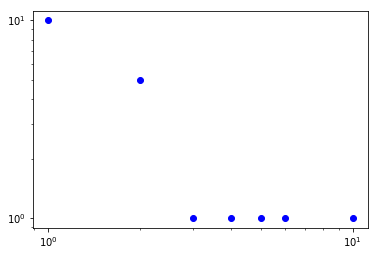

In [36]:
import collections

G = readNetwork(url="http://syrinx.q.t.u-tokyo.ac.jp/tori/lecture/complexnetworks/lec1-q2.csv")


# 各ノードの次数を取得
degree = G.degree
print(degree)

# 次数分布を取得
degree_distribution = collections.Counter(dict(degree).values()) # 次数を次数分布のヒストグラムに変換
print(sorted(degree_distribution.items(), key=lambda x:x[0]))


# 次数分布をプロットする
plt.plot(degree_distribution.keys(), degree_distribution.values(), 'bo') #次数分布をプロット

# 両対数グラフをやめる場合は，この二つのコメントアウトをします．
plt.xscale('log') 
plt.yscale('log')


plt.show()

In [0]:
= 